<a href="https://colab.research.google.com/github/NaiaraSPinto/useful_ee_scripts/blob/main/Entrenamiento_Hydrafloods_COLOMBIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Mapeo Rápido de Inundaciones por medio de la Libreria "HYDRAFLOODS" Utilizando Datos SAR de Sentinel-1 y Google Earth Engine**

# Escalar los flujos de trabajo con HYDRAFloods



En este cuaderno veremos un mayor uso de HYDRAFloods para crear mapas de inundación. Nos centraremos en el uso de los datos SAR de Sentinel 1 para crear mapas de inundaciones para eventos ocurridos dentro del territorio nacional . Si bien nos enfocamos en SAR para este ejercicio, los conceptos se extienden a los datos ópticos.

La Documentacion de la libreria de Python "HYDRAFloods" se puede encontrar en: https://servir-mekong.github.io/hydra-floods/




#Qué es RADAR?
En resumen, la detección remota es el proceso de obtener información sobre un objeto o un área sin estar directamente en contacto con ese objeto. Los sensores aprovechan la radiación electromagnética reflejada o emitida desde la superficie de la Tierra para monitorear y mapear los cambios en la superficie de la Tierra a lo largo del tiempo.

RADAR, que en realidad es un acrónimo de Radio Detection and Ranging, utiliza energía que se encuentra dentro de la porción de microondas del espectro. Estas longitudes de onda de energía más largas dotan a los datos de radar de una serie de ventajas sobre los datos de teledetección óptica

##Mediciones pasivas frente a activas

Los sensores ópticos se denominan sensores pasivos porque dependen únicamente de la energía de una fuente externa (por ejemplo, el sol) para capturar sus medidas. Esta dependencia de fuentes de energía externas limita estos sensores por los efectos de la atmósfera. La energía que simplemente se refleja desde la superficie de la Tierra no puede penetrar cosas como la capa de nubes o la niebla y, por lo tanto, dificulta la recopilación de datos de manera consistente en áreas que experimentan este tipo de clima con frecuencia.

El radar es una forma de detección remota activa. Estos sensores proporcionan su propia fuente artificial de energía para la iluminación de la superficie de la Tierra, que puede atravesar las nubes, la vegetación e incluso el suelo, según el tipo de señal que envíen. Los radares miden la energía que se refleja de su propia señal para generar una imagen de la superficie de la Tierra.

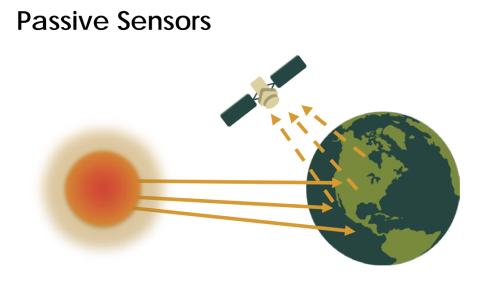

##Pros y contras del radar

*   Monitoreo “para todo clima”. Las microondas pueden penetrar a través de la capa de nubes, la niebla y el humo, lo que hace que los radares sean una fuente de imágenes más confiable y consistente en cualquier lugar. La mayoría del mundo experimenta al menos un 50 % de cobertura de nubes durante un año, por lo que esta mayor capacidad de monitoreo es de gran ayuda. Esta ventaja también crea una oportunidad para una mejor gestión de desastres e incendios forestales.

*   Vigilancia diurna o nocturna. El radar no depende de la energía del sol para tomar sus medidas, por lo que las imágenes se pueden capturar durante el día o la noche.

*   Penetración de la vegetación y el suelo. Las microondas también pueden penetrar a través de la vegetación y el suelo densos, lo que permite que los sensores capturen características de la Tierra que los sensores ópticos no pueden.


*   Interpretación desafiante. A diferencia de las imágenes ópticas, que la mayoría de las personas pueden interpretar intuitivamente, ya que se parecen mucho a una fotografía tomada con el teléfono celular, las imágenes de radar no son tan fáciles de entender de inmediato. Contiene información sobre energía fuera del espectro de luz visible, por lo que a menudo requiere más capacitación para que un usuario comprenda lo que está viendo en una imagen de radar.
*   Moteado. Las imágenes de radar a menudo aparecen más granuladas que las imágenes ópticas.
*   Efectos topográficos. La topografía tiene un efecto mayor en las imágenes de radar que en las imágenes ópticas, ya que el terreno puede reflejar la energía que miden los radares y, por lo tanto, distorsionar la imagen.

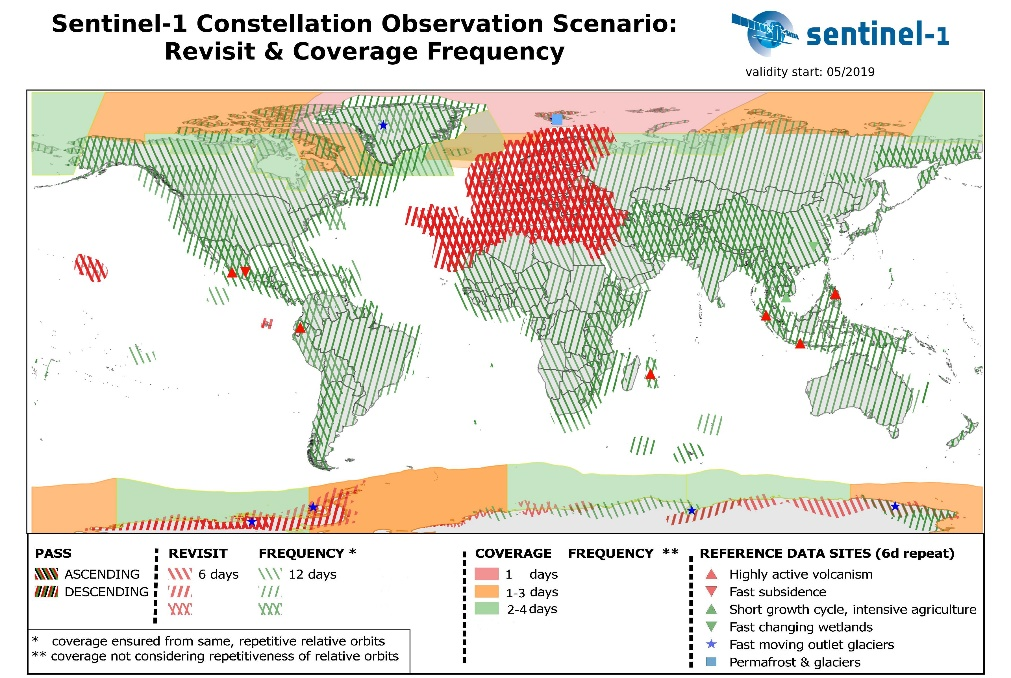

Fuente:  https://sentinel.esa.int/web/sentinel/missions/sentinel-1/observation-scenario

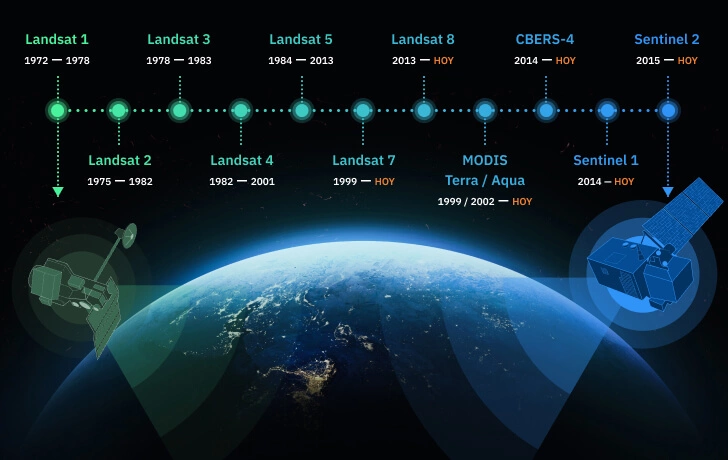

fuente: https://eos.com/es/blog/imagenes-historicas-de-satelite/

## Setup

Trabajaremos por medio de Google Colab que permite las siguientes ventajas:

* Accesibilidad: Google Colab es una plataforma basada en la nube y gratuita, lo
que significa que solo necesitas tener acceso a un navegador web y una conexión a Internet para comenzar a trabajar en ella. No es necesario instalar ningún software adicional en tu computadora.


* Integración con Google Drive: Google Colab se integra con Google Drive, lo que facilita el acceso y la gestión de archivos en la nube. También puedes compartir tus cuadernos de Colab con otros usuarios y trabajar en colaboración en tiempo real.

* Bibliotecas preinstaladas: Colab ya viene con muchas bibliotecas de Python preinstaladas, lo que facilita el inicio del trabajo en proyectos de ciencia de datos y aprendizaje automático.

* Facilidad de uso: La interfaz de usuario de Google Colab es intuitiva y fácil de usar, lo que la hace accesible para usuarios de todos los niveles de habilidad en programación.




Antes de ejecutar el cuaderno, monte su Google Drive en el cuaderno. Utilizaremos Google Drive para almacenar de forma segura las credenciales de Earth Engine para utilizarlas en otros cuadernos. Esto nos permitirá evitar la autenticación cada vez, ahorrando tiempo a lo largo del entrenamiento.

###Paso 1: Vinculacion a espacio o entorno de trabajo


Antes de ejecutar el cuaderno, monte su Google Drive en el cuaderno. Utilizaremos Google Drive para almacenar de forma segura las credenciales de Earth Engine para utilizarlas en otros cuadernos. Esto nos permitirá evitar la autenticación cada vez, ahorrando tiempo a lo largo del entrenamiento

In [ ]:
# mount the google drive so that we can save credentials
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Paso 2: Instalacion de Paquetes Necesarios


Ahora instalaremos el paquete `hydrafloods` para el mapeo de aguas superficiales y `geemap` para la visualización interactiva de los resultados desde Earth Engine.



In [ ]:
# install the packages needed
!pip install hydrafloods geemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.6/85.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.7 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=5a02d4dff38d518c9007950ed11fee46b1c5070f620a00712360abe862a0188f
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
  Created wheel for pipetools: filename=pipetools-1.1.0-py3-none-any.whl size=13601 sha256=d85abbd364604b0ac0b361bc54d35638280a57e6bafdb3a9398fe7af2549e021
  Stored in directory: /root/.cache/pip/wheels/3e/66/b3/357ae471d72e8b2fabf98f8395730c146e15c2be70c4c8c36

In [ ]:
import ee
import datetime
import hydrafloods as hf
import geemap.foliumap as geemap
import geemap.colormaps as cm
from datetime import datetime

Se requiere  crear una cuenta de Google Earth Engine para lo cual se necesita una cuenta Google y se debe de crear la cuenta GEE para fines no comerciales.
https://code.earthengine.google.com/register

In [ ]:
ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=8yNQe0pFTiIn30XoHGbS11LBA7Tw4TldGtIVL1BIcWA&tc=HL3VnG-Y_OXXHgzO5WLOqfkffvQrn_un2PGSO6lQzcE&cc=snhrc4ogSI9hkigzop02-p3qjCvAmS8ZkXL8cDiaFsI

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AfJohXlD_wtY1V4mbOxk31ziUyUV25gO5xqR7WpOhsJD4nqGg6_B5tD5fj0

Successfully saved authorization token.


#CASOS DE ESTUDIO


obener informacion de algunos reportes de eventos de inundacion permiten de manera mas sencilla ubicar aquellos lugares  que sufrieron algun tipo de siniestro y las fechas exactas de cuando se reporto el mismo.

Se pueden tener varios recursos de identificacion de eventos de inundacion ya sea por entidades oficiales o medios de informacion locales.



*   Colab (Eventos historicos Colombia)

https://colab.research.google.com/drive/1AHGUwmjQy2rH3Kd-XXadH4SJr0qrO3R0#scrollTo=Z6Bl5CUtgQ8_

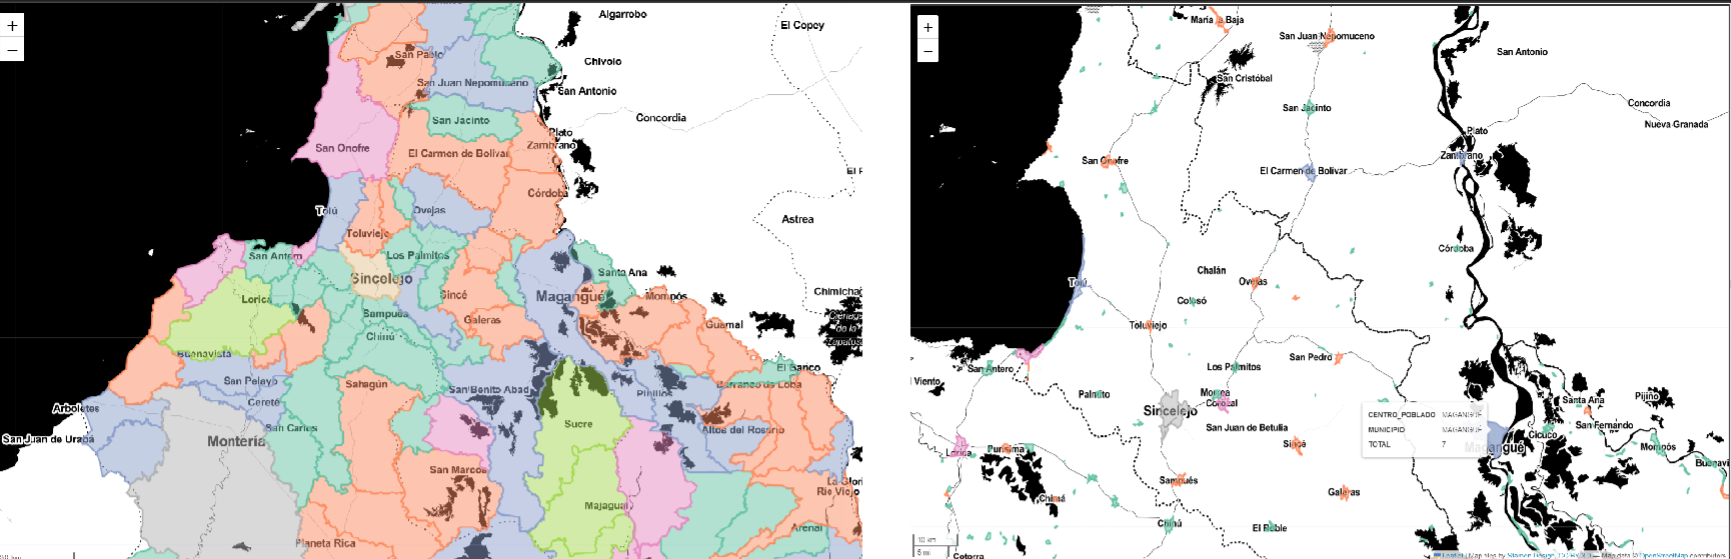

##Colombia
04-07-2021. información sobre inundación por aumento de niveles en el río magdalena reportada el día 4 de julio. en Magangué, corregimientos Barbosa, Bocas de Guamal y Guazo

###Paso 3: Carga de archivos

La capa de división política de Colombia, en la cual se realizarán los análisis de inundación, se extraeran del dataset de Google Earth Engine en el siguiente enlace:
https://developers.google.com/earth-engine/datasets/tags/borders

Especificamente el siguiente dataset
https://developers.google.com/earth-engine/datasets/catalog/FAO_GAUL_2015_level2, desde aca se aplicaran los filtros necesarios para extraer la region de interes.

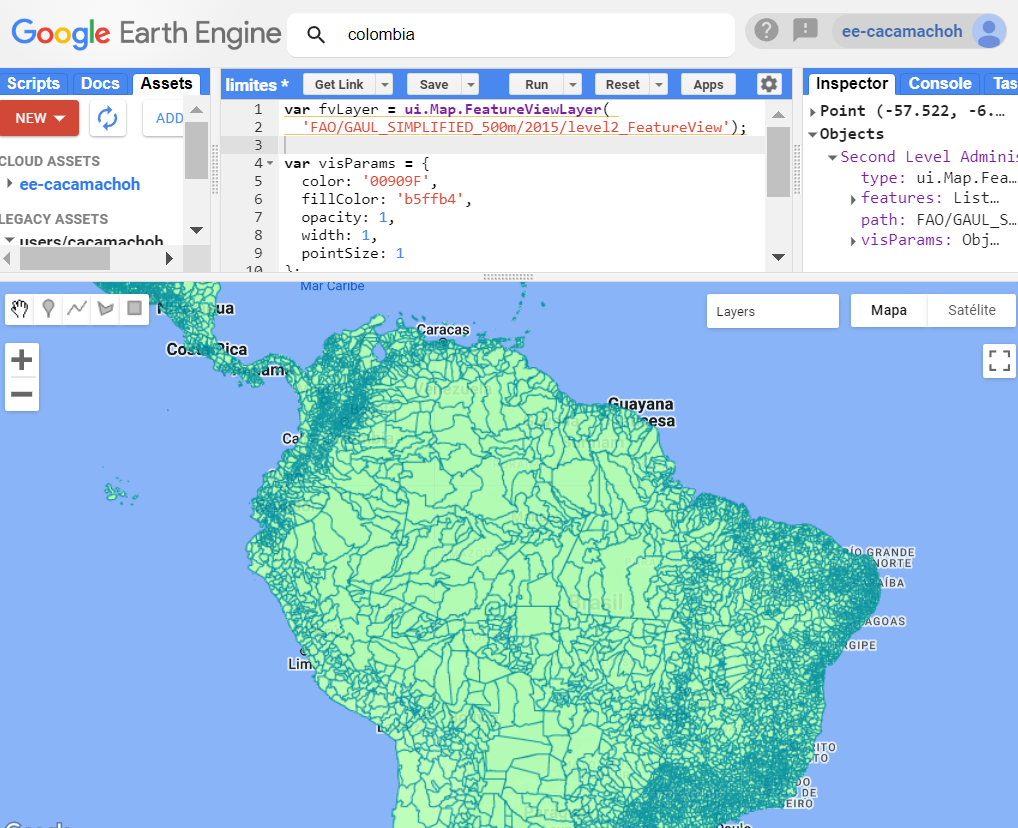

Aplicamos los filtros necesarios de las columnas ADM0_NAME, ADM1_NAME y ADM2_NAME

*   Pais ----   ADM0_NAME : "Colombia"
*   Estado ---- ADM1_NAME : "Bolivar"
*   Distrito----ADM2_NAME : "Magangue"

In [ ]:
Paises = ee.FeatureCollection('FAO/GAUL/2015/level2')

In [ ]:
colombia = ee.Filter.eq("ADM0_NAME", "Colombia")
filtro_colombia = ee.Filter.Or(colombia)

region_colombia = Paises.filter(filtro_colombia)

In [ ]:
lista_mun = region_colombia.aggregate_array('ADM2_NAME').getInfo()
print(ee.List(lista_mun))

In [ ]:
# Aplicamos los filtros necesarios
filtro_dep = ee.Filter.eq("ADM1_NAME", "Bolivar")
filtro_mun = ee.Filter.eq("ADM2_NAME", "Magangue")

filtro = ee.Filter.And(filtro_dep, filtro_mun)
municipio = region_colombia.filter(filtro)

In [ ]:
Map = geemap.Map()
Map.centerObject(municipio)
Map.addLayer(municipio,{},"region")
Map.addLayerControl()
Map

Tambien se puede utilizar la capa de division politica de Colombia  de insumos propios y se encuentran como recurso dentro de un asset en GEE  en el siguiente enlace

https://code.earthengine.google.com/?asset=projects/ee-cacamachoh/assets/limites_colombia ,   tenga en cuenta que segun sus necesidades puede alojar otro recurso diferente al descrito en este taller.

Recurso Shapefile https://drive.google.com/file/d/12ULouecyAqX3EBcBloj6KWjpHG9VbaRH/view?usp=sharing

In [ ]:
colombia_2 = ee.FeatureCollection("projects/ee-cacamachoh/assets/limites_colombia")

In [ ]:
lista_P = colombia_2.aggregate_array('NOMBRE_ENT').getInfo()
print(ee.List(lista_P))

ee.List({
  "constantValue": [
    "BOGOTA, D.C.",
    "BARRANQUILLA",
    "CARTAGENA DE INDIAS",
    "SANTA MARTA",
    "YARUMAL",
    "ANGOSTURA",
    "NARI\u00d1O",
    "CARAMANTA",
    "SANTA ROSA DE OSOS",
    "HELICONIA",
    "ANZA",
    "COPACABANA",
    "CONCEPCION",
    "SAN JERONIMO",
    "YALI",
    "FRONTINO",
    "ARGELIA",
    "DON MATIAS",
    "COCORNA",
    "TITIRIBI",
    "OLAYA",
    "ENTRERRIOS",
    "SANTA FE DE ANTIOQUIA",
    "CA\u00d1ASGORDAS",
    "VEGACHI",
    "URAMITA",
    "SAN ANDRES",
    "MURINDO",
    "VALPARAISO",
    "ANDES",
    "TAMESIS",
    "LA CEJA",
    "SALGAR",
    "JARDIN",
    "CAICEDO",
    "BARBOSA",
    "SAN PEDRO",
    "SAN ROQUE",
    "SANTO DOMINGO",
    "CISNEROS",
    "URRAO",
    "SOPETRAN",
    "MACEO",
    "GIRARDOTA",
    "CARACOLI",
    "FREDONIA",
    "SAN FRANCISCO",
    "VENECIA",
    "SANTA BARBARA",
    "LA UNION",
    "PUERTO TRIUNFO",
    "SABANALARGA",
    "TOLEDO",
    "DABEIBA",
    "CAMPAMENTO",
    "PEQUE",
    "BRICE

In [ ]:
#Codigo DANE PARA MAGANGUE BOLIVAR 13430

# Crear los filtros de igualdad para los cantones
filtro_cod_dep = ee.Filter.eq("COD_DEPART", "13")
filtro_cod_mun = ee.Filter.eq("COD_MUNICI", "430")



filtro_2 = ee.Filter.And(filtro_cod_dep, filtro_cod_mun)
municipio_2 = colombia_2.filter(filtro_2)

In [ ]:
Map = geemap.Map()
Map.centerObject(municipio_2)
Map.addLayer(municipio_2,{},"region")
Map.addLayerControl()
Map

In [ ]:
#LAYER
optical_vis = {
    "min":50,
    "max":5500,
    "bands":"swir2,nir,green",
    "gamma":1.5,
}
#
sar_vis = {
    "bands":"VV",
    "min":-25,
    "max":0
}

vis_params = {
    'color': '000050',
    'colorOpacity': 1,
    'pointSize': 3,
    'pointShape': 'circle',
    'width': 2,
    'lineType': 'solid',
    'fillColorOpacity': 1
}

El inicio de cualquier proceso es la adquisición de datos. Aquí se utiliza HYDRAFloods para conectarse a las colecciones de Earth Engine y aplicar filtros espacio-temporales de nuestro interés con una cantidad mínima de codificación.

###Sentinel 1

## **A.**  EJERCICIO




###Paso 4: Filtrado de datos

Según los parámetros predefinidos, se hace el llmado de una coleccion de imagenes  en Google Earth Engine.

Se filtra por el modo del instrumento(en este caso desde el sensor Sentinel 1), la zona de interes (la imagen se recortan de acuerdo con los límites del área de interés). Por ultimo la temporalidad de las imagenes capturadas filtrando a las fechas en lo ideal antes y despues de la inundación.

Nota: para el ejercicio se buscaran las imagenes mas cercanas despues del evento de inundacion.

####Paso 4.1: Selección del Área de Estudio
En la siguiente sección, se presentarán tres formas diferentes de especificar la ubicación del área de estudio. Esta información es necesaria para limitar la extensión del procesamiento del análisis y evitar los cálculos redundantes.

In [ ]:
# Area de Interes

region_A= hf.country_bbox("Colombia")

region_B= ee.Geometry.Rectangle([-76, 9.1, -74, 8])

region= municipio_2


In [ ]:
Map = geemap.Map()
Map.centerObject(region)
Map.addLayer(region,{},"region")
Map.addLayerControl()
Map

####Paso 4.2: Selección del marco de tiempo
defina un rango de fechas, lo ideal seria encontrar un lapso de tiempo despues del evento de inundacion.

In [ ]:
# get a Sentinel 1 collection
#s1 = hf.Sentinel1(region_p,"2021-01-01","2021-12-31")
s1 = hf.Sentinel1(region,"2021-07-04","2021-07-08")

In [ ]:
# Numero de Escenas segun los requerimientos establecidos
s1.n_images

2

In [ ]:
#
s1.dates

['2021-07-04 10:49:29.000', '2021-07-04 23:14:40.000']

In [ ]:
s1.collection

In [ ]:
##OBTENER PROMEDIO DE DIFERENCIA DE DIAS ENTRE IMAGENES
import builtins
fechas_con_horas = s1.dates

# Función para eliminar las horas de una cadena de fecha y hora
def eliminar_horas(cadena_fecha_hora):
    fecha_con_hora = datetime.strptime(cadena_fecha_hora, '%Y-%m-%d %H:%M:%S.%f')
    fecha_sin_hora = fecha_con_hora.strftime('%Y-%m-%d')
    return fecha_sin_hora

# Reconstruir el arreglo para que solo contenga las fechas
fechas_sin_horas = [eliminar_horas(fecha) for fecha in fechas_con_horas]
# Convertir la lista a un conjunto para eliminar duplicados y luego volver a convertirlo en lista
fechas_sin_duplicados = list(set(fechas_sin_horas))
fechas_ordenadas = sorted(fechas_sin_duplicados)

fechas = fechas_ordenadas
# Convertir las cadenas de fecha a objetos datetime
fechas_datetime = [datetime.strptime(fecha, '%Y-%m-%d') for fecha in fechas]
# Calcular las diferencias en días entre fechas consecutivas
diferencias_dias = [(fechas_datetime[i+1] - fechas_datetime[i]).days for i in range(len(fechas_datetime)-1)]

# Calcular el promedio de las diferencias de días
if len(diferencias_dias) >= 1:
    promedio_diferencias = builtins.sum(diferencias_dias) / len(diferencias_dias)
    print("Promedio de diferencia entre días:", promedio_diferencias)
else:
    print("No hay suficientes fechas para calcular el promedio de diferencias.")



No hay suficientes fechas para calcular el promedio de diferencias.


Visualizacion Preliminar

In [ ]:
Map = geemap.Map()
Map.addLayer(s1.collection.mosaic(),sar_vis, 'Sentinel 1 mosaic')

Map.centerObject(region)
Map.addLayer(region,{},"region")
Map.addLayerControl()
Map

###Paso 5: PRE-PROCESAMIENTO

####Paso 5.1: Terrrain correction / Corrección Geométrica


Esta técnica tratará de compensar las distorsiones geométricas presentes en la imagen debido a la geometría de adquisición SAR. El Algoritmo utiliza un modelo de elevacion digital para hacer dicha corrección. Para realizar las respectivas correciones de las imagenes, extraemos el DEM del dataset de MERIT Hydro: Conjuntos de datos hidrográficos globales , disponibles de GEE

*   MERIT Hydro: Global Hydrography Datasets *90m*

https://developers.google.com/earth-engine/datasets/catalog/MERIT_Hydro_v1_0_1#bands




*   NASADEM: NASA NASADEM Digital Elevation 30m


https://developers.google.com/earth-engine/datasets/catalog/NASA_NASADEM_HGT_001#bands

In [ ]:
#MERIT Hydro: Global Hydrography Datasets 90m

merit = ee.Image("MERIT/Hydro/v1_0_1")

# extract out the DEM and HAND bands
dem = merit.select("elv").unmask(0)
hand = merit.select("hnd").unmask(0)

# .unmask(0) --> anywhere where there is a mask, give it a value of zero

In [ ]:
#NASADEM: NASA NASADEM Digital Elevation 30m

mydem = ee.Image("NASA/NASADEM_HGT/001")

dem30 = mydem.select("elevation").unmask(0)

In [ ]:
# apply a (psuedo-) terrain flattening algorithm to S1 data
s1_flat = s1.apply_func(hf.slope_correction, elevation = dem30, buffer = 100)

####Paso 5.2: Speckle filter/filtro de moteado

Todas las imágenes SAR tienen un cierto grado de lo que se denomina ruido de "Speckle". Este ruido tiene su origen en el carácter aleatorio de la reflectividad observada, causada por la interferencia de numerosos objetos reflectores (scatterers) dentro de una misma celda de resolución. El ruido de Speckle aparece sobreimpuesto a los datos de la imagen como una textura de píxeles muy brillantes o muy oscuros en zonas que realmente son homogéneas, algo así como un efecto de "granos de sal y pimienta". En este caso, la imagen resultante debería ser una imagen de reflectividad igualmente homogénea.

In [ ]:
# apply a speckle filter algorithm to S1 data
s1_filtered = s1_flat.apply_func(hf.gamma_map)

In [ ]:
# aggregate SAR observations to 30x30 m pixels
s1_aggregated = s1_filtered.apply_func(lambda x: x.focal_mean(40,"circle","meters").reproject(ee.Projection("EPSG:4326").atScale(30)))

In [ ]:
Map = geemap.Map()

Map.addLayer(s1_aggregated.collection.mosaic(),sar_vis, 'Sentinel 1 mosaic')
Map.addLayer(s1_flat.collection.median(),{"bands": "VH", "min":-25, "max": 0}, 'Sentinel 1 (terrain flattened)')
Map.addLayer(s1_filtered.collection.median(),{"bands": "VH", "min":-25, "max": 0}, 'Sentinel 1 (speckle filtered)')

Map.centerObject(region)
Map.addLayer(region,{},"Region of Interest")

Map.addLayerControl()
Map

###Paso 6: Clasificacion agua y no agua

In [ ]:
# method from Markert et al., 2020 (https://doi.org/10.3390/rs12152469)
water = s1_filtered.apply_func(hf.edge_otsu, initial_threshold=-16, band="VH" ,edge_buffer=30, scale=30)

In [ ]:
Map = geemap.Map()

Map.addLayer(s1_aggregated.collection.median(),sar_vis, 'Sentinel 1 mosaic')
Map.addLayer(water.collection.mode().selfMask(),{"min":0,"max":1,"palette":cm.palettes.Blues}, 'Sentinel 1 Water')


Map.centerObject(region)
Map.addLayer(region,{},"region")
Map.addLayerControl()
Map

###Paso 7: Análisis e Interpretación de Datos
Ahora que tenemos una imagen lista para el análisis, podemos comenzar a hacer un poco de análisis e interpretación. Recuerde que las imágenes de radar no son lo mismo que las imágenes ópticas: no está mirando la luz visible o infrarroja, sino la cantidad o el nivel de energía que se dispersó de regreso al sistema de radar que está tomando la medición. Repasamos estas ideas en la introducción de esta lección, pero las revisaré nuevamente aquí para poder interpretar mejor las imágenes de radar.

*   `Agua` : Las masas de agua abiertas y generalmente tranquilas (y otras superficies lisas) aparecen muy oscuras en las imágenes debido al reflejo especular que provocan.
*   `Superficies rugosas` : En general, cuanto más rugosa es la superficie, más brillante parece. Las superficies rugosas húmedas parecen las más brillantes debido a las propiedades dieléctricas del agua.
*   `Áreas urbanas` : estas áreas tienden a aparecer más brillantes en las imágenes debido al efecto reflectante de doble rebote que provocan las estructuras verticales. Los edificios que son perpendiculares a la trayectoria de vuelo del satélite aparecerán más brillantes, mientras que los edificios que no sean perpendiculares aparecerán menos.
*   `Inundación bajo coberturas`: Las áreas inundadas se ven más brillantes debido al efecto de doble rebote causado por el agua subterránea sobre la vegetación u otras estructuras.

*   `Reflexión especular`. Las superficies lisas tienden a reflejar toda la energía lejos del radar. Estas áreas aparecen muy oscuras en las imágenes de radar. Ej: aguas abiertas
*   `Reflexión difusa`. Las superficies rugosas, donde el nivel de rugosidad se acerca a la longitud de las microondas, comienzan a reflejar parte de la energía de regreso al radar. Estas áreas parecen algo más brillantes. Ej: áreas abiertas rocosas, pastizales.
*   `Reflexión de doble rebote`. Este tipo de reflexión ocurre cuando la energía rebota en una superficie más lisa y luego rebota nuevamente en un objeto vertical cercano, de modo que la mayor parte de la energía se dispersa nuevamente hacia el radar. Estas áreas parecen muy brillantes. Ej: áreas urbanas, inundaciones.
*   `Dispersión de volumen`. Este tipo de dispersión ocurre dentro de un volumen o medio. La energía rebota en varios elementos diferentes dentro del medio para provocar grandes cantidades de dispersión, parte de la cual regresa al radar. El brillo puede variar, pero suele ser moderadamente brillante. Ej: manto de nieve, bosques.

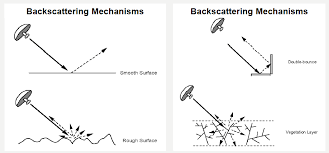

###Paso 8: Extraer inundaciones de aguas permanentes


Para extraer inundaciones necesitamos algún indicador de lo que es normal. Lo "normal" generalmente influye en el aspecto del mapa de inundación resultante. En los siguientes casos, utilizaremos los datos de agua superficial del JRC para comparar el evento y extraer las áreas inundadas.

*   https://global-surface-water.appspot.com/



*   https://developers.google.com/earth-engine/datasets/catalog/JRC_GSW1_4_GlobalSurfaceWater#bands




In [ ]:
water_img = water.collection.mosaic().set("system:time_start", ee.Date("2021-07-04").millis())

In [ ]:
#AGUA PERMANENTE ANUAL
#Para este caso, usaremos 5 años anteriores de agua permanente clasificada para comparar.
floods_yearly = hf.extract_flood(water_img,reference="yearly")

#USANDO OCURRENCIA A LARGO PLAZO
#Aquí usamos el registro completo de agua observada por el JRC y definimos permanente usando un % de umbral de ocurrencia.
floods_occurrence = hf.extract_flood(water_img,reference="occurrence",permanent_threshold=25)


#USO DE INFORMACION ESTACIONAL
# Aquí usaremos la ocurrencia del mes que observamos para eliminar cualquier efecto de estacionalidad que esté presente en las inundaciones.
floods_seasonal = hf.extract_flood(water_img,reference="seasonal",permanent_threshold=25)

In [ ]:
Map = geemap.Map()

Map.addLayer(s1_aggregated.collection.median(),sar_vis, 'Sentinel 1 mosaic')
Map.addLayer(water.collection.mode().selfMask(),{"min":0,"max":1,"palette":cm.palettes.Blues}, 'Sentinel 1 Water')
Map.addLayer(floods_yearly.selfMask(),{"min":0,"max":1,"palette":"#FF7F7F"}, "Sentinel 1 (yearly)")
Map.addLayer(floods_occurrence.selfMask(),{"min":0,"max":1,"palette":"red"}, "Sentinel 1 (ocurrence_25)")
Map.addLayer(floods_seasonal.selfMask(),{"min":0,"max":1,"palette":"darkred"}, "Sentinel 1 (seasonal)")


Map.centerObject(region)
Map.addLayer(region,{},"region")
Map.addLayerControl()
Map

In [ ]:
#Profundidades de agua
flood_depths_30 = hf.fwdet(water_img,dem30,force_projection=True)

In [ ]:
# view the results of flood mapping
Map = geemap.Map()


Map.addLayer(water.collection.mode().selfMask(),{"min":0,"max":1,"palette":cm.palettes.Blues}, 'Sentinel 1 Water')
Map.addLayer(flood_depths_30,{"bands":"depth","max":5,"palette":cm.palettes.viridis_r},"Flood depth 30")

Map.addLayer(region, {}, 'region')
Map.centerObject(region)
Map.addLayerControl()
Map

###**Paso 9:** Exportación de producto


Para exportar los productos generados a una cuenta de Google Drive, se puede exportar de dos maneras, la primera al drive o entorno de trabajo que se este ejecutando, o ala cuenta personal de GEE como us "asset" que se refiere a un conjunto de datos geoespaciales almacenados en la nube de GEE. Un asset puede incluir imágenes satelitales, datos de sensores remotos, mapas base, capas vectoriales, archivos de texto o cualquier otro tipo de información geoespacial que se haya cargado en la plataforma.


`Nota:` El Tiempo de proceso de ejecucion depende de gran medida de la extension de la zona de interes y la resolucion espacial en la que se quiera almacenar la informacion. en el siguiente enlace permite desde su cuenta de GEE ver el avance y demora de la descarga  https://code.earthengine.google.com/tasks





In [ ]:
#Almacenamiento DRIVE PERSONAL - Capa de agua

hf.export_image(
    water.collection.mode(),
    region.geometry(),
    description = "region_water_colombia",
    scale=30,
    crs='EPSG:4326',
    pyramiding={".default":"mode"},
    export_type='toDrive'
)

In [ ]:
#Almacenamiento DRIVE PERSONAL- Profundideas

hf.export_image(
    floods_occurrence,
    region.geometry(),
    description = "region_flood_colombia",
    scale=30,
    crs='EPSG:4326',
    pyramiding={".default":"mode"},
    export_type='toDrive'
)

Para exportar hacia un 'asset' dentro de la plataforma GEE, verifique el respectivo asset_id correspondiente a su usuario.

In [ ]:
##Export tEjemplo_ water

hf.export_image(
    water.collection.mode(),
    region.geometry(),
    description = "region_water_colombia",
    scale=30,
    crs='EPSG:4326',
    pyramiding={"water":"mode"},
    export_type='toAsset',
    asset_id = "projects/ee-cacamachoh/assets/region_water_colombia"
)
##Export tEjemplo - Depths

hf.export_image(
    flood_depths_30,
    region.geometry(),
    description = "region_colombia_flood_depths",
    scale=30,
    crs='EPSG:4326',
    pyramiding={"water":"mode"},
    export_type='toAsset',
    asset_id = "projects/ee-cacamachoh/assets/region_colombia_flood_depths"
)

### **Paso 10:** Cálculo de área de la extensión de inundaciones y su volumen

Para computar el área de la extensión de inundaciones, se crea una nueva capa raster y se calcula el área en metros cuadrados para cada píxel, teniendo en cuenta la proyección. Al sumar todos los píxeles, se deriva la información del área y se convierte en hectáreas.

In [ ]:
# Comenzar por importar una capa de agua ya almacenada desde el asset
event_img = ee.Image("projects/ee-cacamachoh/assets/region_water_colombia")
water_img = event_img.select("water")

Edepth_img = ee.Image("projects/ee-cacamachoh/assets/region_colombia_flood_depths")
depth_img = Edepth_img.select("depth")

In [ ]:
#Tamaño de Pixel

escala = water_img.projection().nominalScale()
info_proyeccion = water_img.projection()
tamano_pixeles = info_proyeccion.nominalScale().getInfo()
print('El tamaño de los píxeles es:', tamano_pixeles, 'metros')

El tamaño de los píxeles es: 30.000000000000004 metros


calculo area


In [ ]:


# Reduce los datos de la imagen a la suma de los píxeles con valor uno en la area de interes
sum = water_img.reduceRegion(
  reducer=ee.Reducer.sum(),
  geometry=region,
  scale=30
)

# Convierte la suma a un objeto "ee.Number"
sum = ee.Number(sum.get("water"))

# Calcula el área en hectáreas
area = sum.multiply(water_img.projection().nominalScale().pow(2)).divide(10000)

# Imprime el área en hectáreas
print('El área de la superficie de agua es: ', area.getInfo(), 'hectáreas')

El área de la superficie de agua es:  17998.155882352938 hectáreas


calculo volumen


In [ ]:
# Reduce los datos de la imagen a la suma de los píxeles con valor uno en la area de interes
sum_d = depth_img.reduceRegion(
  reducer=ee.Reducer.sum(),
  geometry=region,
  scale=30
)

# Convierte la suma a un objeto "ee.Number"
sum_d = ee.Number(sum_d.get("depth"))

# Calcula el área en hectáreas
vol = sum_d.multiply(depth_img.projection().nominalScale().pow(2))

# Imprime el área en hectáreas
print('El Volumen de la superficie de agua es: ', vol.getInfo(), 'metros cubicos')

El Volumen de la superficie de agua es:  143258481.40871343 metros cubicos


`***Nota***` Si al ajecutar el script aparece error,  puede deberse a que el numero de pixeles supera el permitido, para solucionarlo puede utilizar regiones mas pequeñas de analisis o cambiar la escala del pixel (scale)

##Paso 11: Comparando los diferentes enfoques

####Paso 11.1: Pre- and post-event differencing / diferenciando antes despues del evento





In [ ]:
# get imagery for a period before event
preevent = hf.Sentinel1(region,"2021-06-01","2021-06-30")


In [ ]:
preevent.n_images

10

In [ ]:
preevent.dates

['2021-06-04 23:15:34.000',
 '2021-06-16 23:15:34.000',
 '2021-06-28 23:15:35.000',
 '2021-06-05 10:41:19.000',
 '2021-06-10 10:49:28.000',
 '2021-06-10 23:14:39.000',
 '2021-06-17 10:41:20.000',
 '2021-06-22 10:49:29.000',
 '2021-06-22 23:14:39.000',
 '2021-06-29 10:41:20.000']

In [ ]:
# apply a (psuedo-) terrain flattening algorithm to S1 data
preevent_flat = preevent.apply_func(hf.slope_correction, elevation = dem30, buffer = 100)

In [ ]:
# apply a speckle filter algorithm to S1 data
preevent_filtered = preevent_flat.apply_func(hf.gamma_map)

In [ ]:
pre_img = preevent_filtered.collection.median()

####Pasi 11.2: Classification differencing

In [ ]:
pre_water = hf.edge_otsu(pre_img,initial_threshold=-16, band="VH", edge_buffer=30,region=region,scale=30)

In [ ]:
floods_prepost = hf.discrete_difference(water_img,pre_water)

In [ ]:
# view the results of flood mapping
Map = geemap.Map()


Map.addLayer(pre_img,{"bands": "VV", "min":-25, "max": 0}, 'pre-event Sentinel 1')
Map.addLayer(pre_water.selfMask(),{"min":0,"max":1,"palette":cm.palettes.Blues}, "pre-event water")

Map.addLayer(s1_aggregated.collection.median(),sar_vis, 'Sentinel 1 mosaic Post')
Map.addLayer(water_img.selfMask(),{"min":0,"max":1,"palette":cm.palettes.Blues}, 'Sentinel 1 Water')



Map.addLayer(floods_prepost.selfMask(),{"min":0,"max":1,"palette":"red"}, "event flooding")

Map.centerObject(region)
Map.addLayer(region,{},"Region of Interest")
Map.addLayerControl()
Map

### OTROS SENSORES Landsat 8

In [ ]:
region = municipio_2
start_time = "2021-07-04"
end_time = "2021-12-31"

In [ ]:
# get a Landsat 8 collection
lc8 = hf.Landsat8(region,start_time,end_time)

In [ ]:
lc8.n_images

23

In [ ]:
lc8.dates

['2021-07-06 15:17:14.329',
 '2021-07-22 15:17:18.653',
 '2021-08-07 15:17:26.169',
 '2021-08-23 15:17:31.067',
 '2021-09-08 15:17:35.848',
 '2021-09-24 15:17:38.673',
 '2021-10-10 15:17:44.527',
 '2021-10-26 15:17:46.087',
 '2021-11-11 15:17:42.536',
 '2021-11-27 15:17:41.497',
 '2021-12-13 15:17:40.965',
 '2021-12-29 15:17:35.389',
 '2021-07-06 15:17:38.233',
 '2021-07-22 15:17:42.565',
 '2021-08-07 15:17:50.085',
 '2021-08-23 15:17:54.983',
 '2021-09-24 15:18:02.581',
 '2021-10-10 15:18:08.431',
 '2021-10-26 15:18:09.995',
 '2021-11-11 15:18:06.444',
 '2021-11-27 15:18:05.409',
 '2021-12-13 15:18:04.873',
 '2021-12-29 15:17:59.297']

In [ ]:
lc8.collection

Name,Units,Scale,Wavelength,Description
B1,,0.0001,0.435-0.451 μm,Band 1 (ultra blue) surface reflectance
B2,,0.0001,0.452-0.512 μm,Band 2 (blue) surface reflectance
B3,,0.0001,0.533-0.590 μm,Band 3 (green) surface reflectance
B4,,0.0001,0.636-0.673 μm,Band 4 (red) surface reflectance
B5,,0.0001,0.851-0.879 μm,Band 5 (near infrared) surface reflectance
B6,,0.0001,1.566-1.651 μm,Band 6 (shortwave infrared 1) surface reflectance
B7,,0.0001,2.107-2.294 μm,Band 7 (shortwave infrared 2) surface reflectance
B10,Kelvin,0.1,10.60-11.19 μm,"Band 10 brightness temperature. This band, while originally collected with a resolution of 100m / pixel, has been resampled using cubic convolution to 30m."
B11,Kelvin,0.1,11.50-12.51 μm,"Band 11 brightness temperature. This band, while originally collected with a resolution of 100m / pixel, has been resampled using cubic convolution to 30m."
sr_aerosol,,,,Aerosol attributes


In [ ]:
lc8_errors = lc8.filter(ee.Filter.gt("CLOUD_COVER",60))

In [ ]:
mosaic = lc8.collection.median()

In [ ]:
# calculate water index
# here we calculate the modified normalized water index
water_index = lc8.apply_func(hf.mndwi)

In [ ]:
# extract water from each image
water_L = water_index.apply_func(hf.edge_otsu, initial_threshold=-0.9, edge_buffer=300,invert=True,thresh_no_data=0)


# thresh_no_data=0

In [ ]:
water_mosaic = water_L.collection.mode()

In [ ]:
Map = geemap.Map()
Map.addLayer(mosaic,optical_vis, 'Landsat 8')
Map.addLayer(water_mosaic.selfMask(),{"min":0,"max":1,"palette":cm.palettes.Blues}, 'Landsat 8 Water')


Map.centerObject(region)
Map.addLayer(region,{},"region")
Map.addLayerControl()
Map